In [25]:
%matplotlib inline
from infomap import infomap
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [44]:
def findCommunities(G):
    """
    Partition network with the Infomap algorithm.
    Annotates nodes with 'community' id and return number of communities found.
    """
    conf = infomap.init("--two-level");
    # Input data
    network = infomap.Network(conf);
    # Output data
    tree = infomap.HierarchicalNetwork(conf)

    print("Building network...")
    for e in G.edges_iter():
        network.addLink(*e)

    network.finalizeAndCheckNetwork(True, nx.number_of_nodes(G));

    # Cluster network
    infomap.run(network, tree);

    print("Found %d top modules with codelength: %f" % (tree.numTopModules(), tree.codelength()))

    communities = {}
    clusterIndexLevel = 1 # 1, 2, ... or -1 for top, second, ... or lowest cluster level
    for node in tree.leafIter(clusterIndexLevel):
        communities[node.originalLeafIndex] = node.clusterIndex()
    print communities

    nx.set_node_attributes(G, 'community', communities)
    return tree.numTopModules()

In [35]:
def drawNetwork(G):
    # position map
    pos = nx.spring_layout(G)
    # community ids
    communities = [v for k,v in nx.get_node_attributes(G, 'community').items()]
    numCommunities = max(communities) + 1
    # color map from http://colorbrewer2.org/
    cmapLight = colors.ListedColormap(['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6'], 'indexed', numCommunities)
    cmapDark = colors.ListedColormap(['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a'], 'indexed', numCommunities)

    # edges
    nx.draw_networkx_edges(G, pos)

    # nodes
    nodeCollection = nx.draw_networkx_nodes(G,
        pos = pos,
        node_color = communities,
        cmap = cmapLight
    )
    # set node border color to the darker shade
    darkColors = [cmapDark(v) for v in communities]
    nodeCollection.set_edgecolor(darkColors)

    # Print node labels separately instead
    for n in G.nodes_iter():
        plt.annotate(n,
            xy = pos[n],
            textcoords = 'offset points',
            horizontalalignment = 'center',
            verticalalignment = 'center',
            xytext = [0, 2],
            color = cmapDark(communities[n])
        )

    plt.axis('off')
    # plt.savefig("karate.png")
    plt.show()

Building network...
Found 3 top modules with codelength: 4.311793
{0: 1, 1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 2, 7: 1, 8: 0, 9: 1, 10: 2, 11: 1, 12: 1, 13: 1, 14: 0, 15: 0, 16: 2, 17: 1, 18: 0, 19: 1, 20: 0, 21: 1, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0}
Number of communities found: 3


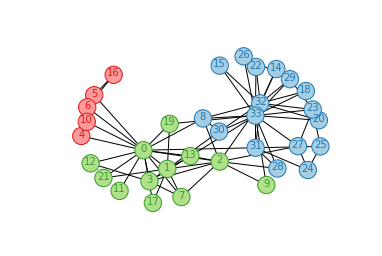

In [45]:
G=nx.karate_club_graph()

numCommunities = findCommunities(G)

print("Number of communities found: %d" % numCommunities)

drawNetwork(G)


In [43]:
numCommunities

0